In [39]:
import sys
sys.path.append('/N/dc2/projects/lifebid/Paolo/code/o3d-code/figures')
sys.path.append('/N/dc2/projects/lifebid/Paolo/local/python/src/dipy')
sys.path.append('/N/dc2/projects/lifebid/Paolo/local/python/src/nibabel')

In [40]:
import glob
from plot_response import plot_response

In [41]:
src_dir = '/N/dc2/projects/lifebid/Paolo/data/O3D_BL_test'
out_dir = src_dir + '/' + 'figures/response'

In [ ]:
for s in range(1,2):
    src_res = glob.glob("%s/proj-5a022fc99c0d250055709e9c/sub-00%02d/dt-neuro-recon.id-*/response.txt" % (src_dir, s))[0]
    out_png = "%s/sub-00%02d_response.png" % (out_dir, s)
    plot_response(src_res, out_png)

In [ ]:
app id 5bca308550fdf50028c6342c
input id 5a050a00eec2b300611abff3
proj id 5a022fc99c0d250055709e9c

In [ ]:
bl app run --id 5bca308550fdf50028c6342c --input dwi:5a050a00eec2b300611abff3 --project 5a022fc99c0d250055709e9c

In [54]:
import numpy as np

In [65]:
aa = np.array([[[1, 2], [3, 4]], [[5, 6], [8, 9]]])

In [66]:
aa.shape

(2, 2, 2)

In [67]:
aa.mean(axis=2)

array([[ 1.5,  3.5],
       [ 5.5,  8.5]])

In [62]:
a2=np.array((2,2,2))

In [63]:
a2

array([2, 2, 2])

In [77]:
import json

In [100]:
with open('/N/dc2/projects/lifebid/Paolo/code/o3d-code/figures/sub-0001_snr.json', "r") as src_json:
    snr = json.load(src_json)

In [103]:
float(snr["SNR data"][0].split()[1])

16.007166119

In [102]:
len(snr["SNR data"])

97

In [126]:
dim = len(snr["SNR data"])
data = np.zeros(dim)
for i in range(dim):
    data[i] = float(snr["SNR data"][i].split()[1])

In [106]:
data.shape

(97,)

In [108]:
data2 = data

In [116]:
m = np.vstack((data, data2))

In [121]:
data[1:].mean()

6.0022137074889583

In [122]:
data

array([ 16.00716612,   9.91250356,   9.3422384 ,   3.07769384,
         9.34520577,   5.68601315,   7.4724766 ,   3.39318899,
         9.51455789,  10.30292483,   8.11024946,   8.52356188,
         8.35537552,   6.29782151,   3.65919263,   3.42741974,
         3.03095775,   9.75745842,   3.53859018,   2.89424672,
         2.97839289,   5.68537728,   8.55090408,   4.83066839,
         9.6244566 ,   3.98147034,   6.4611329 ,   7.80821346,
         8.82612776,   4.8141359 ,   9.81850148,   3.08691389,
         7.01793892,   4.23666426,   7.31404017,   4.6852672 ,
         6.02185598,   4.30629151,   3.42794963,   5.77429244,
         4.21886003,   8.49611369,   6.68347379,   9.34976281,
         3.18398932,   7.63822548,   5.30661354,   5.58045951,
        10.01434798,   2.92370847,   4.17064025,   3.56783998,
         8.39479916,   7.55927221,   9.48594395,   8.04888846,
         3.13100055,   2.8843908 ,   4.63609362,   4.53255356,
         2.8683882 ,   7.72459718,   9.75608071,   7.15

In [123]:
with open('/N/dc2/projects/lifebid/Paolo/code/o3d-code/figures/sub-0005_snr.json', "r") as src_json:
    snr_0005 = json.load(src_json)

In [125]:
dim = len(snr_0005["SNR data"])
data_0005 = np.zeros(dim)
for i in range(dim):
    data_0005[i] = float(snr_0005["SNR data"][i].split()[1])

In [170]:
with open('/N/dc2/projects/lifebid/Paolo/code/o3d-code/figures/sub-0009_snr.json', "r") as src_json:
    snr_0009 = json.load(src_json)

In [171]:
dim = len(snr_0009["SNR data"])
data_0009 = np.zeros(dim)
for i in range(dim):
    data_0009[i] = float(snr_0009["SNR data"][i].split()[1])

In [176]:
stat = np.vstack((data[1:79], data_0005[1:79], data_0009[1:]))

In [251]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

In [252]:
def load_snr_stat(snr_src):
    
    with open(snr_src, "r") as json_src:
        snr_json = json.load(json_src)
    dim = len(snr_json["SNR data"])
    snr_data = np.zeros(dim)
    for i in range(dim):
        snr_data[i] = float(snr_json["SNR data"][i].split()[1])
        
    return snr_data

In [319]:
def plot_snr_set(file_set, dir_out="."):
    
    all_sub = []
    all_stat = []
    for f in range(len(file_set)):
        all_sub.append(os.path.basename(file_set[f])[:8])
        all_stat.append(load_snr_stat(file_set[f]))
    all_sub.append("")
    all_sub.reverse()
    all_stat.reverse()
        
    p = plt.subplot()
    xmin = 0
    xmax = 50
    p.set_xlim([xmin, xmax])
    ymin = 1
    ymax = len(all_sub)
    p.set_xlim([xmin, xmax])
    p.set_ylim([ymin, ymax])
    p.spines['right'].set_visible(False)
    p.spines['top'].set_visible(False)
    p.spines['left'].set_position(('axes', -0.05))
    p.spines['bottom'].set_position(('axes', -0.05))
    p.yaxis.set_ticks(np.arange(len(all_sub)))
    p.yaxis.set_ticks_position('left')
    p.xaxis.set_ticks_position('bottom')
    p.set_yticklabels(all_sub)
    color = mcolors.cnames['blue']
    plt.title("SNR of diffusion signal")
    
    for s in range(len(all_stat)):
        stat = all_stat[s]
        p.errorbar(stat[1:].mean(), s+1, xerr=stat[1:].std(), \
                   marker='o', linestyle='None', color=color)
        p.plot(stat[0], s+1, marker='x', color=color)
                   
    plt.show()
    snr_out = "snr_" + "_".join(map("{}".format, all_sub[1:])) + ".eps"
    plt.savefig(os.path.join(dir_out, snr_out), bbox_inches='tight', magnification=10)

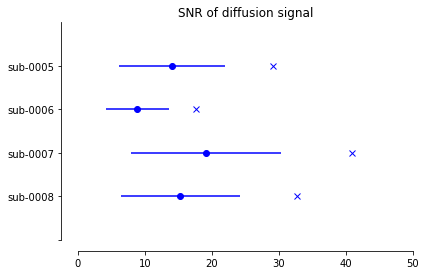

In [321]:
f1 = '/N/dc2/projects/lifebid/Paolo/code/o3d-code/figures/sub-0005_snr.json'
f2 = '/N/dc2/projects/lifebid/Paolo/code/o3d-code/figures/sub-0006_snr.json'
f3 = '/N/dc2/projects/lifebid/Paolo/code/o3d-code/figures/sub-0007_snr.json'
f4 = '/N/dc2/projects/lifebid/Paolo/code/o3d-code/figures/sub-0008_snr.json'
out = '/N/dc2/projects/lifebid/Paolo/code/o3d-code/figures'
plot_snr_set([f1, f2, f3, f4], dir_out=out)

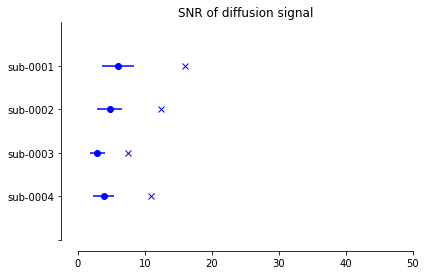

In [322]:
f1 = '/N/dc2/projects/lifebid/Paolo/code/o3d-code/figures/sub-0001_snr.json'
f2 = '/N/dc2/projects/lifebid/Paolo/code/o3d-code/figures/sub-0002_snr.json'
f3 = '/N/dc2/projects/lifebid/Paolo/code/o3d-code/figures/sub-0003_snr.json'
f4 = '/N/dc2/projects/lifebid/Paolo/code/o3d-code/figures/sub-0004_snr.json'
out = '/N/dc2/projects/lifebid/Paolo/code/o3d-code/figures'
plot_snr_set([f1, f2, f3, f4], dir_out=out)

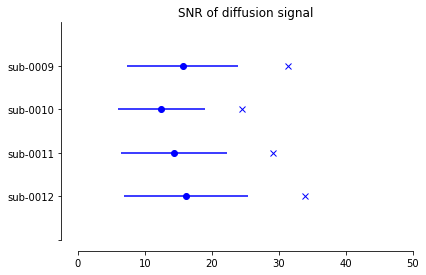

In [323]:
f1 = '/N/dc2/projects/lifebid/Paolo/code/o3d-code/figures/sub-0009_snr.json'
f2 = '/N/dc2/projects/lifebid/Paolo/code/o3d-code/figures/sub-0010_snr.json'
f3 = '/N/dc2/projects/lifebid/Paolo/code/o3d-code/figures/sub-0011_snr.json'
f4 = '/N/dc2/projects/lifebid/Paolo/code/o3d-code/figures/sub-0012_snr.json'
out = '/N/dc2/projects/lifebid/Paolo/code/o3d-code/figures'
plot_snr_set([f1, f2, f3, f4], dir_out=out)

In [204]:
ss = []
s = "sub-0002_snr.gz"
s[:8]
ss.append(s[:8])
ss.append(s[:8])
ss

['sub-0002', 'sub-0002']

In [262]:
p.set_xscale?

In [153]:
stat.mean()

10.20525516514402

In [207]:
pp = ['s1', 's2', 's3']

In [213]:
"snr_" + "_".join(map("{}".format, pp))

'snr_s1_s2_s3'

In [310]:
pp.reverse()

In [311]:
pp

['s3', 's2', 's1']

In [318]:
pp[1:]

['s2', 's1']